In [1]:
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [2]:
df = pd.read_csv('WSD_Text2.csv')
df.shape

(82018, 1)

In [3]:
df.head()

,Text
0,penyerang paris saint germain psg neymar beran...
1,langkawi sepasang suami isteri yang juga suspe...
2,kuala terengganu presiden pas datuk seri abdul...
3,hulu langat tindakan pas yang masih membantu g...
4,semenyih presiden parti pribumi bersatu malays...


In [4]:
df.isnull().sum()

Text    0
dtype: int64

In [5]:
df = df.dropna().drop_duplicates()
df.shape

(82000, 1)

In [6]:
from gensim.models.phrases import Phrases, Phraser

INFO - 09:49:28: 'pattern' package not found; tag filters are not available for English


In [7]:
#turn into sentences
sent = [row.split() for row in df['Text']]

In [9]:
#Phrases() takes a list of list of words as input
phrases = Phrases(sent, min_count=30, progress_per=10000)

INFO - 09:53:20: collecting all words and their counts
INFO - 09:53:20: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 09:53:32: PROGRESS: at sentence #10000, processed 2486378 words and 875453 word types
INFO - 09:53:43: PROGRESS: at sentence #20000, processed 4960303 words and 1432429 word types
INFO - 09:53:54: PROGRESS: at sentence #30000, processed 7413921 words and 1894924 word types
INFO - 09:54:03: PROGRESS: at sentence #40000, processed 9898121 words and 2313700 word types
INFO - 09:54:13: PROGRESS: at sentence #50000, processed 12374311 words and 2695723 word types
INFO - 09:54:23: PROGRESS: at sentence #60000, processed 14912956 words and 3054652 word types
INFO - 09:54:32: PROGRESS: at sentence #70000, processed 17417116 words and 3402075 word types
INFO - 09:54:42: PROGRESS: at sentence #80000, processed 19967740 words and 3715697 word types
INFO - 09:54:44: collected 3774925 word types from a corpus of 20480390 words (unigram + bigrams) and 82000 sent

In [11]:
import multiprocessing

from gensim.models import Word2Vec

In [12]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer

In [13]:
cores

4

In [14]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [15]:
bigram = Phraser(phrases)

INFO - 10:09:44: source_vocab length 3774925
INFO - 10:10:56: Phraser built with 14110 phrasegrams


In [18]:
t = time()

w2v_model.build_vocab(sent, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 10:13:10: collecting all words and their counts
INFO - 10:13:10: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 10:13:11: PROGRESS: at sentence #10000, processed 2486378 words, keeping 57829 word types
INFO - 10:13:12: PROGRESS: at sentence #20000, processed 4960303 words, keeping 84784 word types
INFO - 10:13:12: PROGRESS: at sentence #30000, processed 7413921 words, keeping 105972 word types
INFO - 10:13:13: PROGRESS: at sentence #40000, processed 9898121 words, keeping 125038 word types
INFO - 10:13:14: PROGRESS: at sentence #50000, processed 12374311 words, keeping 142233 word types
INFO - 10:13:15: PROGRESS: at sentence #60000, processed 14912956 words, keeping 157827 word types
INFO - 10:13:15: PROGRESS: at sentence #70000, processed 17417116 words, keeping 173159 word types
INFO - 10:13:16: PROGRESS: at sentence #80000, processed 19967740 words, keeping 185877 word types
INFO - 10:13:16: collected 188483 word types from a corpus of 20480390 raw w

Time to build vocab: 0.13 mins


In [19]:
t = time()

w2v_model.train(sent, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 10:15:00: training model with 3 workers on 24132 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2
INFO - 10:15:01: EPOCH 1 - PROGRESS: at 1.20% examples, 126511 words/s, in_qsize 5, out_qsize 0
INFO - 10:15:02: EPOCH 1 - PROGRESS: at 2.94% examples, 153774 words/s, in_qsize 6, out_qsize 0
INFO - 10:15:03: EPOCH 1 - PROGRESS: at 4.70% examples, 161426 words/s, in_qsize 5, out_qsize 0
INFO - 10:15:04: EPOCH 1 - PROGRESS: at 6.30% examples, 164370 words/s, in_qsize 5, out_qsize 0
INFO - 10:15:05: EPOCH 1 - PROGRESS: at 7.87% examples, 164139 words/s, in_qsize 5, out_qsize 0
INFO - 10:15:06: EPOCH 1 - PROGRESS: at 9.56% examples, 166306 words/s, in_qsize 6, out_qsize 0
INFO - 10:15:07: EPOCH 1 - PROGRESS: at 11.35% examples, 168210 words/s, in_qsize 6, out_qsize 0
INFO - 10:15:08: EPOCH 1 - PROGRESS: at 13.12% examples, 168506 words/s, in_qsize 5, out_qsize 0
INFO - 10:15:10: EPOCH 1 - PROGRESS: at 14.81% examples, 168762 words/s, in_qsize 5, out_qsize 

INFO - 10:16:23: EPOCH 2 - PROGRESS: at 35.95% examples, 168577 words/s, in_qsize 5, out_qsize 0
INFO - 10:16:24: EPOCH 2 - PROGRESS: at 37.56% examples, 168433 words/s, in_qsize 5, out_qsize 0
INFO - 10:16:25: EPOCH 2 - PROGRESS: at 39.17% examples, 168313 words/s, in_qsize 6, out_qsize 0
INFO - 10:16:26: EPOCH 2 - PROGRESS: at 40.81% examples, 168215 words/s, in_qsize 5, out_qsize 0
INFO - 10:16:27: EPOCH 2 - PROGRESS: at 42.49% examples, 168147 words/s, in_qsize 6, out_qsize 0
INFO - 10:16:28: EPOCH 2 - PROGRESS: at 44.08% examples, 168105 words/s, in_qsize 6, out_qsize 0
INFO - 10:16:29: EPOCH 2 - PROGRESS: at 45.73% examples, 168191 words/s, in_qsize 5, out_qsize 0
INFO - 10:16:30: EPOCH 2 - PROGRESS: at 47.42% examples, 168267 words/s, in_qsize 6, out_qsize 0
INFO - 10:16:31: EPOCH 2 - PROGRESS: at 48.95% examples, 168161 words/s, in_qsize 5, out_qsize 0
INFO - 10:16:32: EPOCH 2 - PROGRESS: at 50.57% examples, 168241 words/s, in_qsize 6, out_qsize 0
INFO - 10:16:33: EPOCH 2 - PRO

INFO - 10:17:45: EPOCH 3 - PROGRESS: at 63.11% examples, 161903 words/s, in_qsize 5, out_qsize 0
INFO - 10:17:46: EPOCH 3 - PROGRESS: at 64.64% examples, 161989 words/s, in_qsize 6, out_qsize 0
INFO - 10:17:47: EPOCH 3 - PROGRESS: at 66.20% examples, 161987 words/s, in_qsize 5, out_qsize 0
INFO - 10:17:48: EPOCH 3 - PROGRESS: at 67.73% examples, 162112 words/s, in_qsize 6, out_qsize 0
INFO - 10:17:49: EPOCH 3 - PROGRESS: at 69.24% examples, 162058 words/s, in_qsize 5, out_qsize 0
INFO - 10:17:50: EPOCH 3 - PROGRESS: at 70.85% examples, 162159 words/s, in_qsize 5, out_qsize 0
INFO - 10:17:51: EPOCH 3 - PROGRESS: at 72.21% examples, 162046 words/s, in_qsize 5, out_qsize 0
INFO - 10:17:52: EPOCH 3 - PROGRESS: at 73.72% examples, 161929 words/s, in_qsize 5, out_qsize 0
INFO - 10:17:53: EPOCH 3 - PROGRESS: at 75.19% examples, 161745 words/s, in_qsize 5, out_qsize 0
INFO - 10:17:54: EPOCH 3 - PROGRESS: at 76.62% examples, 161629 words/s, in_qsize 5, out_qsize 0
INFO - 10:17:55: EPOCH 3 - PRO

INFO - 10:19:07: EPOCH 4 - PROGRESS: at 88.06% examples, 162115 words/s, in_qsize 5, out_qsize 0
INFO - 10:19:08: EPOCH 4 - PROGRESS: at 89.50% examples, 162004 words/s, in_qsize 6, out_qsize 0
INFO - 10:19:09: EPOCH 4 - PROGRESS: at 90.84% examples, 161778 words/s, in_qsize 6, out_qsize 0
INFO - 10:19:10: EPOCH 4 - PROGRESS: at 92.31% examples, 161676 words/s, in_qsize 5, out_qsize 0
INFO - 10:19:11: EPOCH 4 - PROGRESS: at 93.72% examples, 161564 words/s, in_qsize 5, out_qsize 0
INFO - 10:19:12: EPOCH 4 - PROGRESS: at 94.91% examples, 160996 words/s, in_qsize 5, out_qsize 0
INFO - 10:19:13: EPOCH 4 - PROGRESS: at 96.22% examples, 160540 words/s, in_qsize 5, out_qsize 0
INFO - 10:19:14: EPOCH 4 - PROGRESS: at 97.56% examples, 160254 words/s, in_qsize 6, out_qsize 0
INFO - 10:19:15: EPOCH 4 - PROGRESS: at 98.98% examples, 160014 words/s, in_qsize 5, out_qsize 0
INFO - 10:19:16: worker thread finished; awaiting finish of 2 more threads
INFO - 10:19:16: worker thread finished; awaiting fi

INFO - 10:20:27: EPOCH 6 - PROGRESS: at 6.24% examples, 158899 words/s, in_qsize 5, out_qsize 0
INFO - 10:20:28: EPOCH 6 - PROGRESS: at 7.76% examples, 159719 words/s, in_qsize 5, out_qsize 0
INFO - 10:20:29: EPOCH 6 - PROGRESS: at 9.28% examples, 160170 words/s, in_qsize 5, out_qsize 0
INFO - 10:20:30: EPOCH 6 - PROGRESS: at 10.86% examples, 160633 words/s, in_qsize 6, out_qsize 0
INFO - 10:20:31: EPOCH 6 - PROGRESS: at 12.44% examples, 160566 words/s, in_qsize 5, out_qsize 0
INFO - 10:20:32: EPOCH 6 - PROGRESS: at 14.03% examples, 161164 words/s, in_qsize 5, out_qsize 0
INFO - 10:20:33: EPOCH 6 - PROGRESS: at 15.56% examples, 161170 words/s, in_qsize 5, out_qsize 0
INFO - 10:20:34: EPOCH 6 - PROGRESS: at 17.14% examples, 161098 words/s, in_qsize 5, out_qsize 0
INFO - 10:20:35: EPOCH 6 - PROGRESS: at 18.75% examples, 161298 words/s, in_qsize 5, out_qsize 0
INFO - 10:20:36: EPOCH 6 - PROGRESS: at 20.35% examples, 161354 words/s, in_qsize 5, out_qsize 0
INFO - 10:20:37: EPOCH 6 - PROGRE

INFO - 10:21:49: EPOCH 7 - PROGRESS: at 29.64% examples, 152044 words/s, in_qsize 5, out_qsize 0
INFO - 10:21:50: EPOCH 7 - PROGRESS: at 31.19% examples, 152398 words/s, in_qsize 5, out_qsize 0
INFO - 10:21:51: EPOCH 7 - PROGRESS: at 32.69% examples, 152719 words/s, in_qsize 6, out_qsize 0
INFO - 10:21:52: EPOCH 7 - PROGRESS: at 34.02% examples, 151957 words/s, in_qsize 5, out_qsize 0
INFO - 10:21:53: EPOCH 7 - PROGRESS: at 35.35% examples, 151328 words/s, in_qsize 5, out_qsize 0
INFO - 10:21:54: EPOCH 7 - PROGRESS: at 36.85% examples, 151233 words/s, in_qsize 5, out_qsize 0
INFO - 10:21:55: EPOCH 7 - PROGRESS: at 38.37% examples, 151489 words/s, in_qsize 5, out_qsize 0
INFO - 10:21:57: EPOCH 7 - PROGRESS: at 39.99% examples, 151776 words/s, in_qsize 5, out_qsize 0
INFO - 10:21:58: EPOCH 7 - PROGRESS: at 41.49% examples, 151939 words/s, in_qsize 6, out_qsize 0
INFO - 10:21:59: EPOCH 7 - PROGRESS: at 43.11% examples, 152339 words/s, in_qsize 5, out_qsize 0
INFO - 10:22:00: EPOCH 7 - PRO

INFO - 10:23:12: EPOCH 8 - PROGRESS: at 51.81% examples, 156118 words/s, in_qsize 6, out_qsize 0
INFO - 10:23:13: EPOCH 8 - PROGRESS: at 53.35% examples, 156110 words/s, in_qsize 5, out_qsize 0
INFO - 10:23:14: EPOCH 8 - PROGRESS: at 54.90% examples, 156383 words/s, in_qsize 5, out_qsize 0
INFO - 10:23:15: EPOCH 8 - PROGRESS: at 56.38% examples, 156315 words/s, in_qsize 5, out_qsize 0
INFO - 10:23:16: EPOCH 8 - PROGRESS: at 57.93% examples, 156292 words/s, in_qsize 5, out_qsize 0
INFO - 10:23:17: EPOCH 8 - PROGRESS: at 59.26% examples, 155678 words/s, in_qsize 5, out_qsize 0
INFO - 10:23:18: EPOCH 8 - PROGRESS: at 60.73% examples, 155495 words/s, in_qsize 5, out_qsize 0
INFO - 10:23:19: EPOCH 8 - PROGRESS: at 62.25% examples, 155366 words/s, in_qsize 5, out_qsize 0
INFO - 10:23:20: EPOCH 8 - PROGRESS: at 63.71% examples, 155315 words/s, in_qsize 6, out_qsize 0
INFO - 10:23:21: EPOCH 8 - PROGRESS: at 65.14% examples, 155290 words/s, in_qsize 5, out_qsize 0
INFO - 10:23:22: EPOCH 8 - PRO

INFO - 10:24:34: EPOCH 9 - PROGRESS: at 68.57% examples, 146180 words/s, in_qsize 5, out_qsize 0
INFO - 10:24:36: EPOCH 9 - PROGRESS: at 70.13% examples, 146382 words/s, in_qsize 5, out_qsize 0
INFO - 10:24:37: EPOCH 9 - PROGRESS: at 71.69% examples, 146810 words/s, in_qsize 5, out_qsize 0
INFO - 10:24:38: EPOCH 9 - PROGRESS: at 73.19% examples, 147178 words/s, in_qsize 6, out_qsize 0
INFO - 10:24:39: EPOCH 9 - PROGRESS: at 74.66% examples, 147451 words/s, in_qsize 5, out_qsize 0
INFO - 10:24:40: EPOCH 9 - PROGRESS: at 76.20% examples, 147753 words/s, in_qsize 5, out_qsize 0
INFO - 10:24:41: EPOCH 9 - PROGRESS: at 77.73% examples, 148016 words/s, in_qsize 6, out_qsize 0
INFO - 10:24:42: EPOCH 9 - PROGRESS: at 79.31% examples, 148293 words/s, in_qsize 5, out_qsize 0
INFO - 10:24:43: EPOCH 9 - PROGRESS: at 80.96% examples, 148557 words/s, in_qsize 5, out_qsize 0
INFO - 10:24:44: EPOCH 9 - PROGRESS: at 82.52% examples, 148904 words/s, in_qsize 5, out_qsize 0
INFO - 10:24:45: EPOCH 9 - PRO

INFO - 10:25:56: EPOCH 10 - PROGRESS: at 87.52% examples, 150755 words/s, in_qsize 5, out_qsize 0
INFO - 10:25:57: EPOCH 10 - PROGRESS: at 89.00% examples, 150945 words/s, in_qsize 5, out_qsize 0
INFO - 10:25:58: EPOCH 10 - PROGRESS: at 90.42% examples, 151047 words/s, in_qsize 5, out_qsize 0
INFO - 10:25:59: EPOCH 10 - PROGRESS: at 91.92% examples, 151192 words/s, in_qsize 5, out_qsize 0
INFO - 10:26:00: EPOCH 10 - PROGRESS: at 93.02% examples, 150577 words/s, in_qsize 5, out_qsize 0
INFO - 10:26:02: EPOCH 10 - PROGRESS: at 94.46% examples, 150649 words/s, in_qsize 6, out_qsize 0
INFO - 10:26:03: EPOCH 10 - PROGRESS: at 95.90% examples, 150659 words/s, in_qsize 6, out_qsize 0
INFO - 10:26:04: EPOCH 10 - PROGRESS: at 97.39% examples, 150684 words/s, in_qsize 5, out_qsize 0
INFO - 10:26:05: EPOCH 10 - PROGRESS: at 98.93% examples, 150789 words/s, in_qsize 5, out_qsize 0
INFO - 10:26:05: worker thread finished; awaiting finish of 2 more threads
INFO - 10:26:05: worker thread finished; aw

INFO - 10:27:15: EPOCH 12 - PROGRESS: at 3.00% examples, 154672 words/s, in_qsize 5, out_qsize 0
INFO - 10:27:16: EPOCH 12 - PROGRESS: at 4.53% examples, 154939 words/s, in_qsize 5, out_qsize 0
INFO - 10:27:17: EPOCH 12 - PROGRESS: at 6.10% examples, 156983 words/s, in_qsize 5, out_qsize 0
INFO - 10:27:18: EPOCH 12 - PROGRESS: at 7.47% examples, 156116 words/s, in_qsize 5, out_qsize 0
INFO - 10:27:19: EPOCH 12 - PROGRESS: at 8.94% examples, 155405 words/s, in_qsize 5, out_qsize 0
INFO - 10:27:20: EPOCH 12 - PROGRESS: at 10.45% examples, 155944 words/s, in_qsize 5, out_qsize 0
INFO - 10:27:21: EPOCH 12 - PROGRESS: at 11.95% examples, 155114 words/s, in_qsize 5, out_qsize 0
INFO - 10:27:22: EPOCH 12 - PROGRESS: at 13.48% examples, 155115 words/s, in_qsize 5, out_qsize 0
INFO - 10:27:23: EPOCH 12 - PROGRESS: at 14.95% examples, 155091 words/s, in_qsize 6, out_qsize 0
INFO - 10:27:24: EPOCH 12 - PROGRESS: at 16.47% examples, 155273 words/s, in_qsize 5, out_qsize 0
INFO - 10:27:25: EPOCH 12

INFO - 10:28:37: EPOCH 13 - PROGRESS: at 27.20% examples, 164468 words/s, in_qsize 5, out_qsize 0
INFO - 10:28:38: EPOCH 13 - PROGRESS: at 28.90% examples, 164604 words/s, in_qsize 5, out_qsize 0
INFO - 10:28:39: EPOCH 13 - PROGRESS: at 30.42% examples, 164439 words/s, in_qsize 5, out_qsize 0
INFO - 10:28:40: EPOCH 13 - PROGRESS: at 32.00% examples, 164307 words/s, in_qsize 5, out_qsize 0
INFO - 10:28:41: EPOCH 13 - PROGRESS: at 33.58% examples, 164264 words/s, in_qsize 5, out_qsize 0
INFO - 10:28:42: EPOCH 13 - PROGRESS: at 35.20% examples, 164344 words/s, in_qsize 5, out_qsize 0
INFO - 10:28:43: EPOCH 13 - PROGRESS: at 36.85% examples, 164225 words/s, in_qsize 6, out_qsize 0
INFO - 10:28:44: EPOCH 13 - PROGRESS: at 38.41% examples, 164354 words/s, in_qsize 5, out_qsize 0
INFO - 10:28:45: EPOCH 13 - PROGRESS: at 39.93% examples, 164032 words/s, in_qsize 6, out_qsize 0
INFO - 10:28:46: EPOCH 13 - PROGRESS: at 41.55% examples, 164046 words/s, in_qsize 6, out_qsize 0
INFO - 10:28:47: EPO

INFO - 10:30:00: EPOCH 14 - PROGRESS: at 43.64% examples, 153704 words/s, in_qsize 5, out_qsize 0
INFO - 10:30:01: EPOCH 14 - PROGRESS: at 45.16% examples, 153855 words/s, in_qsize 5, out_qsize 0
INFO - 10:30:02: EPOCH 14 - PROGRESS: at 46.80% examples, 153939 words/s, in_qsize 5, out_qsize 0
INFO - 10:30:03: EPOCH 14 - PROGRESS: at 48.19% examples, 153843 words/s, in_qsize 5, out_qsize 0
INFO - 10:30:04: EPOCH 14 - PROGRESS: at 49.73% examples, 153993 words/s, in_qsize 6, out_qsize 0
INFO - 10:30:05: EPOCH 14 - PROGRESS: at 51.25% examples, 154061 words/s, in_qsize 5, out_qsize 0
INFO - 10:30:06: EPOCH 14 - PROGRESS: at 52.84% examples, 154243 words/s, in_qsize 5, out_qsize 0
INFO - 10:30:07: EPOCH 14 - PROGRESS: at 54.34% examples, 154272 words/s, in_qsize 6, out_qsize 0
INFO - 10:30:08: EPOCH 14 - PROGRESS: at 55.83% examples, 154164 words/s, in_qsize 6, out_qsize 0
INFO - 10:30:09: EPOCH 14 - PROGRESS: at 57.28% examples, 154036 words/s, in_qsize 6, out_qsize 0
INFO - 10:30:10: EPO

INFO - 10:31:23: EPOCH 15 - PROGRESS: at 61.72% examples, 147199 words/s, in_qsize 5, out_qsize 0
INFO - 10:31:24: EPOCH 15 - PROGRESS: at 63.36% examples, 147530 words/s, in_qsize 5, out_qsize 0
INFO - 10:31:25: EPOCH 15 - PROGRESS: at 64.86% examples, 147930 words/s, in_qsize 5, out_qsize 0
INFO - 10:31:26: EPOCH 15 - PROGRESS: at 66.44% examples, 148323 words/s, in_qsize 5, out_qsize 0
INFO - 10:31:27: EPOCH 15 - PROGRESS: at 67.82% examples, 148373 words/s, in_qsize 6, out_qsize 0
INFO - 10:31:28: EPOCH 15 - PROGRESS: at 69.37% examples, 148703 words/s, in_qsize 6, out_qsize 0
INFO - 10:31:29: EPOCH 15 - PROGRESS: at 70.98% examples, 149021 words/s, in_qsize 5, out_qsize 0
INFO - 10:31:30: EPOCH 15 - PROGRESS: at 72.45% examples, 149347 words/s, in_qsize 5, out_qsize 0
INFO - 10:31:31: EPOCH 15 - PROGRESS: at 73.92% examples, 149549 words/s, in_qsize 5, out_qsize 0
INFO - 10:31:32: EPOCH 15 - PROGRESS: at 75.44% examples, 149863 words/s, in_qsize 6, out_qsize 0
INFO - 10:31:33: EPO

INFO - 10:32:45: EPOCH 16 - PROGRESS: at 77.68% examples, 144958 words/s, in_qsize 5, out_qsize 0
INFO - 10:32:46: EPOCH 16 - PROGRESS: at 78.88% examples, 144614 words/s, in_qsize 5, out_qsize 0
INFO - 10:32:47: EPOCH 16 - PROGRESS: at 80.20% examples, 144340 words/s, in_qsize 5, out_qsize 0
INFO - 10:32:48: EPOCH 16 - PROGRESS: at 81.80% examples, 144722 words/s, in_qsize 5, out_qsize 0
INFO - 10:32:49: EPOCH 16 - PROGRESS: at 83.35% examples, 145087 words/s, in_qsize 5, out_qsize 0
INFO - 10:32:50: EPOCH 16 - PROGRESS: at 84.68% examples, 145026 words/s, in_qsize 6, out_qsize 0
INFO - 10:32:51: EPOCH 16 - PROGRESS: at 86.11% examples, 145137 words/s, in_qsize 5, out_qsize 0
INFO - 10:32:53: EPOCH 16 - PROGRESS: at 87.61% examples, 145264 words/s, in_qsize 5, out_qsize 0
INFO - 10:32:54: EPOCH 16 - PROGRESS: at 88.97% examples, 145288 words/s, in_qsize 5, out_qsize 0
INFO - 10:32:55: EPOCH 16 - PROGRESS: at 90.25% examples, 145213 words/s, in_qsize 5, out_qsize 0
INFO - 10:32:56: EPO

INFO - 10:34:06: worker thread finished; awaiting finish of 2 more threads
INFO - 10:34:06: worker thread finished; awaiting finish of 1 more threads
INFO - 10:34:06: worker thread finished; awaiting finish of 0 more threads
INFO - 10:34:06: EPOCH - 17 : training on 20480390 raw words (10597095 effective words) took 65.5s, 161824 effective words/s
INFO - 10:34:08: EPOCH 18 - PROGRESS: at 1.40% examples, 145196 words/s, in_qsize 6, out_qsize 0
INFO - 10:34:09: EPOCH 18 - PROGRESS: at 2.85% examples, 148126 words/s, in_qsize 5, out_qsize 0
INFO - 10:34:10: EPOCH 18 - PROGRESS: at 4.38% examples, 151494 words/s, in_qsize 5, out_qsize 0
INFO - 10:34:11: EPOCH 18 - PROGRESS: at 6.01% examples, 154468 words/s, in_qsize 5, out_qsize 0
INFO - 10:34:12: EPOCH 18 - PROGRESS: at 7.56% examples, 156824 words/s, in_qsize 6, out_qsize 0
INFO - 10:34:13: EPOCH 18 - PROGRESS: at 9.09% examples, 157239 words/s, in_qsize 6, out_qsize 0
INFO - 10:34:14: EPOCH 18 - PROGRESS: at 10.65% examples, 158302 wor

INFO - 10:35:26: EPOCH 19 - PROGRESS: at 20.62% examples, 162318 words/s, in_qsize 6, out_qsize 0
INFO - 10:35:27: EPOCH 19 - PROGRESS: at 22.27% examples, 162530 words/s, in_qsize 5, out_qsize 0
INFO - 10:35:28: EPOCH 19 - PROGRESS: at 23.82% examples, 162480 words/s, in_qsize 5, out_qsize 0
INFO - 10:35:29: EPOCH 19 - PROGRESS: at 25.41% examples, 162418 words/s, in_qsize 5, out_qsize 0
INFO - 10:35:30: EPOCH 19 - PROGRESS: at 27.05% examples, 162433 words/s, in_qsize 5, out_qsize 0
INFO - 10:35:31: EPOCH 19 - PROGRESS: at 28.79% examples, 162487 words/s, in_qsize 5, out_qsize 0
INFO - 10:35:32: EPOCH 19 - PROGRESS: at 30.42% examples, 162514 words/s, in_qsize 5, out_qsize 0
INFO - 10:35:33: EPOCH 19 - PROGRESS: at 32.00% examples, 162693 words/s, in_qsize 5, out_qsize 0
INFO - 10:35:34: EPOCH 19 - PROGRESS: at 33.58% examples, 162819 words/s, in_qsize 5, out_qsize 0
INFO - 10:35:35: EPOCH 19 - PROGRESS: at 35.20% examples, 162637 words/s, in_qsize 5, out_qsize 0
INFO - 10:35:36: EPO

INFO - 10:36:48: EPOCH 20 - PROGRESS: at 47.96% examples, 163170 words/s, in_qsize 5, out_qsize 0
INFO - 10:36:50: EPOCH 20 - PROGRESS: at 49.58% examples, 163240 words/s, in_qsize 5, out_qsize 0
INFO - 10:36:51: EPOCH 20 - PROGRESS: at 51.15% examples, 163255 words/s, in_qsize 6, out_qsize 0
INFO - 10:36:52: EPOCH 20 - PROGRESS: at 52.75% examples, 163250 words/s, in_qsize 5, out_qsize 0
INFO - 10:36:53: EPOCH 20 - PROGRESS: at 54.34% examples, 163218 words/s, in_qsize 5, out_qsize 0
INFO - 10:36:54: EPOCH 20 - PROGRESS: at 55.87% examples, 163152 words/s, in_qsize 5, out_qsize 0
INFO - 10:36:55: EPOCH 20 - PROGRESS: at 57.43% examples, 163234 words/s, in_qsize 5, out_qsize 0
INFO - 10:36:56: EPOCH 20 - PROGRESS: at 59.00% examples, 163206 words/s, in_qsize 5, out_qsize 0
INFO - 10:36:57: EPOCH 20 - PROGRESS: at 60.57% examples, 163214 words/s, in_qsize 6, out_qsize 0
INFO - 10:36:58: EPOCH 20 - PROGRESS: at 62.16% examples, 163201 words/s, in_qsize 5, out_qsize 0
INFO - 10:36:59: EPO

INFO - 10:38:11: EPOCH 21 - PROGRESS: at 73.32% examples, 160626 words/s, in_qsize 5, out_qsize 0
INFO - 10:38:12: EPOCH 21 - PROGRESS: at 74.58% examples, 160133 words/s, in_qsize 5, out_qsize 0
INFO - 10:38:13: EPOCH 21 - PROGRESS: at 76.10% examples, 160254 words/s, in_qsize 5, out_qsize 0
INFO - 10:38:14: EPOCH 21 - PROGRESS: at 77.68% examples, 160427 words/s, in_qsize 5, out_qsize 0
INFO - 10:38:15: EPOCH 21 - PROGRESS: at 79.26% examples, 160433 words/s, in_qsize 5, out_qsize 0
INFO - 10:38:16: EPOCH 21 - PROGRESS: at 80.96% examples, 160517 words/s, in_qsize 5, out_qsize 0
INFO - 10:38:17: EPOCH 21 - PROGRESS: at 82.47% examples, 160564 words/s, in_qsize 5, out_qsize 0
INFO - 10:38:18: EPOCH 21 - PROGRESS: at 84.04% examples, 160671 words/s, in_qsize 5, out_qsize 0
INFO - 10:38:19: EPOCH 21 - PROGRESS: at 85.54% examples, 160684 words/s, in_qsize 5, out_qsize 0
INFO - 10:38:20: EPOCH 21 - PROGRESS: at 87.13% examples, 160660 words/s, in_qsize 5, out_qsize 0
INFO - 10:38:21: EPO

INFO - 10:39:33: EPOCH 22 - PROGRESS: at 95.57% examples, 156605 words/s, in_qsize 5, out_qsize 0
INFO - 10:39:34: EPOCH 22 - PROGRESS: at 97.14% examples, 156726 words/s, in_qsize 5, out_qsize 0
INFO - 10:39:35: EPOCH 22 - PROGRESS: at 98.72% examples, 156780 words/s, in_qsize 5, out_qsize 0
INFO - 10:39:36: worker thread finished; awaiting finish of 2 more threads
INFO - 10:39:36: worker thread finished; awaiting finish of 1 more threads
INFO - 10:39:36: worker thread finished; awaiting finish of 0 more threads
INFO - 10:39:36: EPOCH - 22 : training on 20480390 raw words (10593995 effective words) took 67.5s, 156879 effective words/s
INFO - 10:39:37: EPOCH 23 - PROGRESS: at 1.55% examples, 154484 words/s, in_qsize 5, out_qsize 0
INFO - 10:39:38: EPOCH 23 - PROGRESS: at 3.15% examples, 160112 words/s, in_qsize 5, out_qsize 0
INFO - 10:39:39: EPOCH 23 - PROGRESS: at 4.75% examples, 160615 words/s, in_qsize 5, out_qsize 0
INFO - 10:39:40: EPOCH 23 - PROGRESS: at 6.30% examples, 161158 w

INFO - 10:40:53: EPOCH 24 - PROGRESS: at 15.65% examples, 159676 words/s, in_qsize 6, out_qsize 0
INFO - 10:40:54: EPOCH 24 - PROGRESS: at 17.19% examples, 159952 words/s, in_qsize 5, out_qsize 0
INFO - 10:40:55: EPOCH 24 - PROGRESS: at 18.79% examples, 160123 words/s, in_qsize 5, out_qsize 0
INFO - 10:40:56: EPOCH 24 - PROGRESS: at 20.35% examples, 159903 words/s, in_qsize 5, out_qsize 0
INFO - 10:40:57: EPOCH 24 - PROGRESS: at 21.89% examples, 160094 words/s, in_qsize 5, out_qsize 0
INFO - 10:40:58: EPOCH 24 - PROGRESS: at 23.39% examples, 160008 words/s, in_qsize 5, out_qsize 0
INFO - 10:40:59: EPOCH 24 - PROGRESS: at 24.93% examples, 160142 words/s, in_qsize 6, out_qsize 0
INFO - 10:41:00: EPOCH 24 - PROGRESS: at 26.46% examples, 159512 words/s, in_qsize 5, out_qsize 0
INFO - 10:41:01: EPOCH 24 - PROGRESS: at 28.10% examples, 159828 words/s, in_qsize 5, out_qsize 0
INFO - 10:41:02: EPOCH 24 - PROGRESS: at 29.69% examples, 159873 words/s, in_qsize 6, out_qsize 0
INFO - 10:41:03: EPO

INFO - 10:42:15: EPOCH 25 - PROGRESS: at 40.45% examples, 158835 words/s, in_qsize 6, out_qsize 0
INFO - 10:42:16: EPOCH 25 - PROGRESS: at 42.04% examples, 159017 words/s, in_qsize 5, out_qsize 0
INFO - 10:42:17: EPOCH 25 - PROGRESS: at 43.59% examples, 158996 words/s, in_qsize 5, out_qsize 0
INFO - 10:42:18: EPOCH 25 - PROGRESS: at 45.21% examples, 159214 words/s, in_qsize 5, out_qsize 0
INFO - 10:42:19: EPOCH 25 - PROGRESS: at 46.85% examples, 159288 words/s, in_qsize 5, out_qsize 0
INFO - 10:42:20: EPOCH 25 - PROGRESS: at 48.34% examples, 159263 words/s, in_qsize 5, out_qsize 0
INFO - 10:42:21: EPOCH 25 - PROGRESS: at 49.85% examples, 159282 words/s, in_qsize 5, out_qsize 0
INFO - 10:42:22: EPOCH 25 - PROGRESS: at 51.44% examples, 159408 words/s, in_qsize 5, out_qsize 0
INFO - 10:42:23: EPOCH 25 - PROGRESS: at 53.04% examples, 159498 words/s, in_qsize 5, out_qsize 0
INFO - 10:42:24: EPOCH 25 - PROGRESS: at 54.58% examples, 159550 words/s, in_qsize 5, out_qsize 0
INFO - 10:42:25: EPO

INFO - 10:43:37: EPOCH 26 - PROGRESS: at 65.43% examples, 159776 words/s, in_qsize 5, out_qsize 0
INFO - 10:43:38: EPOCH 26 - PROGRESS: at 66.94% examples, 159905 words/s, in_qsize 5, out_qsize 0
INFO - 10:43:39: EPOCH 26 - PROGRESS: at 68.47% examples, 159908 words/s, in_qsize 5, out_qsize 0
INFO - 10:43:40: EPOCH 26 - PROGRESS: at 70.09% examples, 160016 words/s, in_qsize 5, out_qsize 0
INFO - 10:43:42: EPOCH 26 - PROGRESS: at 71.51% examples, 159972 words/s, in_qsize 5, out_qsize 0
INFO - 10:43:43: EPOCH 26 - PROGRESS: at 72.96% examples, 159977 words/s, in_qsize 5, out_qsize 0
INFO - 10:43:44: EPOCH 26 - PROGRESS: at 74.48% examples, 159976 words/s, in_qsize 5, out_qsize 0
INFO - 10:43:45: EPOCH 26 - PROGRESS: at 75.99% examples, 160053 words/s, in_qsize 5, out_qsize 0
INFO - 10:43:46: EPOCH 26 - PROGRESS: at 77.54% examples, 160149 words/s, in_qsize 5, out_qsize 0
INFO - 10:43:47: EPOCH 26 - PROGRESS: at 79.05% examples, 160157 words/s, in_qsize 5, out_qsize 0
INFO - 10:43:48: EPO

INFO - 10:45:00: EPOCH 27 - PROGRESS: at 90.56% examples, 163628 words/s, in_qsize 5, out_qsize 0
INFO - 10:45:01: EPOCH 27 - PROGRESS: at 92.10% examples, 163636 words/s, in_qsize 5, out_qsize 0
INFO - 10:45:02: EPOCH 27 - PROGRESS: at 93.72% examples, 163670 words/s, in_qsize 6, out_qsize 0
INFO - 10:45:03: EPOCH 27 - PROGRESS: at 95.34% examples, 163796 words/s, in_qsize 5, out_qsize 0
INFO - 10:45:04: EPOCH 27 - PROGRESS: at 96.89% examples, 163823 words/s, in_qsize 5, out_qsize 0
INFO - 10:45:05: EPOCH 27 - PROGRESS: at 98.48% examples, 163821 words/s, in_qsize 5, out_qsize 0
INFO - 10:45:06: worker thread finished; awaiting finish of 2 more threads
INFO - 10:45:06: worker thread finished; awaiting finish of 1 more threads
INFO - 10:45:06: worker thread finished; awaiting finish of 0 more threads
INFO - 10:45:06: EPOCH - 27 : training on 20480390 raw words (10594773 effective words) took 64.6s, 163911 effective words/s
INFO - 10:45:07: EPOCH 28 - PROGRESS: at 1.54% examples, 15922

INFO - 10:46:18: EPOCH 29 - PROGRESS: at 12.66% examples, 163483 words/s, in_qsize 6, out_qsize 0
INFO - 10:46:19: EPOCH 29 - PROGRESS: at 14.22% examples, 163680 words/s, in_qsize 5, out_qsize 0
INFO - 10:46:20: EPOCH 29 - PROGRESS: at 15.81% examples, 163761 words/s, in_qsize 5, out_qsize 0
INFO - 10:46:21: EPOCH 29 - PROGRESS: at 17.35% examples, 163554 words/s, in_qsize 5, out_qsize 0
INFO - 10:46:22: EPOCH 29 - PROGRESS: at 19.05% examples, 164338 words/s, in_qsize 5, out_qsize 0
INFO - 10:46:23: EPOCH 29 - PROGRESS: at 20.62% examples, 164051 words/s, in_qsize 5, out_qsize 0
INFO - 10:46:24: EPOCH 29 - PROGRESS: at 22.23% examples, 163817 words/s, in_qsize 5, out_qsize 0
INFO - 10:46:26: EPOCH 29 - PROGRESS: at 23.82% examples, 163907 words/s, in_qsize 6, out_qsize 0
INFO - 10:46:27: EPOCH 29 - PROGRESS: at 25.41% examples, 163993 words/s, in_qsize 6, out_qsize 0
INFO - 10:46:28: EPOCH 29 - PROGRESS: at 27.05% examples, 163980 words/s, in_qsize 5, out_qsize 0
INFO - 10:46:29: EPO

INFO - 10:47:40: EPOCH 30 - PROGRESS: at 39.74% examples, 163462 words/s, in_qsize 5, out_qsize 0
INFO - 10:47:41: EPOCH 30 - PROGRESS: at 41.33% examples, 163521 words/s, in_qsize 5, out_qsize 0
INFO - 10:47:42: EPOCH 30 - PROGRESS: at 42.97% examples, 163550 words/s, in_qsize 5, out_qsize 0
INFO - 10:47:43: EPOCH 30 - PROGRESS: at 44.54% examples, 163525 words/s, in_qsize 5, out_qsize 0
INFO - 10:47:44: EPOCH 30 - PROGRESS: at 46.26% examples, 163721 words/s, in_qsize 6, out_qsize 0
INFO - 10:47:45: EPOCH 30 - PROGRESS: at 47.78% examples, 163668 words/s, in_qsize 6, out_qsize 0
INFO - 10:47:46: EPOCH 30 - PROGRESS: at 49.38% examples, 163758 words/s, in_qsize 5, out_qsize 0
INFO - 10:47:47: EPOCH 30 - PROGRESS: at 51.00% examples, 163804 words/s, in_qsize 5, out_qsize 0
INFO - 10:47:48: EPOCH 30 - PROGRESS: at 52.61% examples, 163739 words/s, in_qsize 6, out_qsize 0
INFO - 10:47:49: EPOCH 30 - PROGRESS: at 54.20% examples, 163726 words/s, in_qsize 5, out_qsize 0
INFO - 10:47:50: EPO

Time to train the model: 33.32 mins


In [20]:
w2v_model.init_sims(replace=True)

INFO - 10:52:05: precomputing L2-norms of word weight vectors


In [21]:
w2v_model.wv.most_similar(positive=["sepak"])

[('bolasepak', 0.7233338952064514),
 ('bola', 0.7147327661514282),
 ('keranjang', 0.5429242253303528),
 ('badminton', 0.5424306988716125),
 ('hoki', 0.5060116052627563),
 ('sukan', 0.5049644112586975),
 ('ragbi', 0.4836820065975189),
 ('liga', 0.47387397289276123),
 ('fifa', 0.46796268224716187),
 ('tenis', 0.46290457248687744)]

In [22]:
w2v_model.wv.similarity('suka', 'benci')

0.35996038

In [23]:
w2v_model.wv.doesnt_match(['anwar', 'mahathir', 'rafizi'])

'rafizi'

In [24]:
w2v_model.wv.most_similar(positive=["wanita", "anwar"], negative=["azizah"], topn=3)

[('lelaki', 0.4638175368309021),
 ('remaja', 0.41598978638648987),
 ('individu', 0.39757248759269714)]

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [28]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

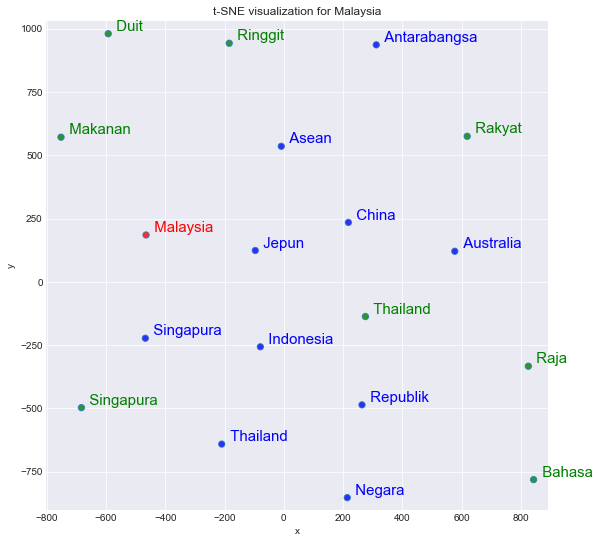

In [29]:
tsnescatterplot(w2v_model, 'malaysia', ['singapura', 'thailand', 'makanan', 'ringgit', 'rakyat', 'raja', 'duit', 'bahasa'])

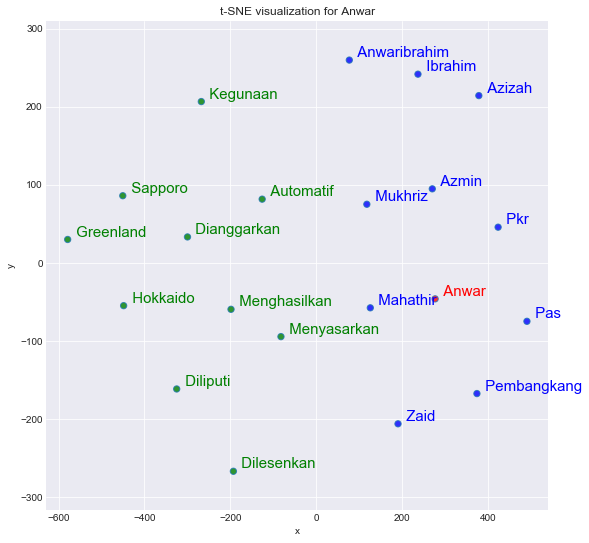

In [30]:
tsnescatterplot(w2v_model, 'anwar', [i[0] for i in w2v_model.wv.most_similar(negative=["anwar"])])

In [31]:
w2v_model.save("word2vecBM.model")

INFO - 11:13:41: saving Word2Vec object under word2vecBM.model, separately None
INFO - 11:13:41: not storing attribute vectors_norm
INFO - 11:13:41: not storing attribute cum_table
INFO - 11:13:42: saved word2vecBM.model
